In [1]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Procesamiento de Datos

In [2]:
# obtener el conjunto de datos
df = pd.read_csv('heart.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='output'>

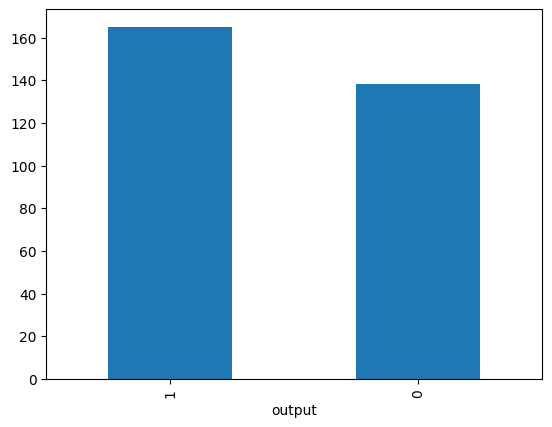

In [6]:
# see if the data is balance in a plot
df["output"].value_counts().plot(kind='bar')

In [7]:
# Verify if there are any null values
print(df.isna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Transformación de Datos


In [9]:
from sklearn.preprocessing import LabelEncoder

# ---------------------> DROP DATA <---------------------

df.drop(
    columns=["chol", "fbs", "trtbps", "restecg", "slp", "oldpeak", "caa"],
    inplace=True,
)

# df = df.loc[df["thall"] != 0]

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'thalachh', 'exng', 'thall', 'output'], dtype='object')

In [11]:
df.describe()

,age,sex,cp,thalachh,exng,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,149.646865,0.326733,2.313531,0.544554
std,9.082101,0.466011,1.032052,22.905161,0.469794,0.612277,0.498835
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,133.500000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,3.000000,1.000000


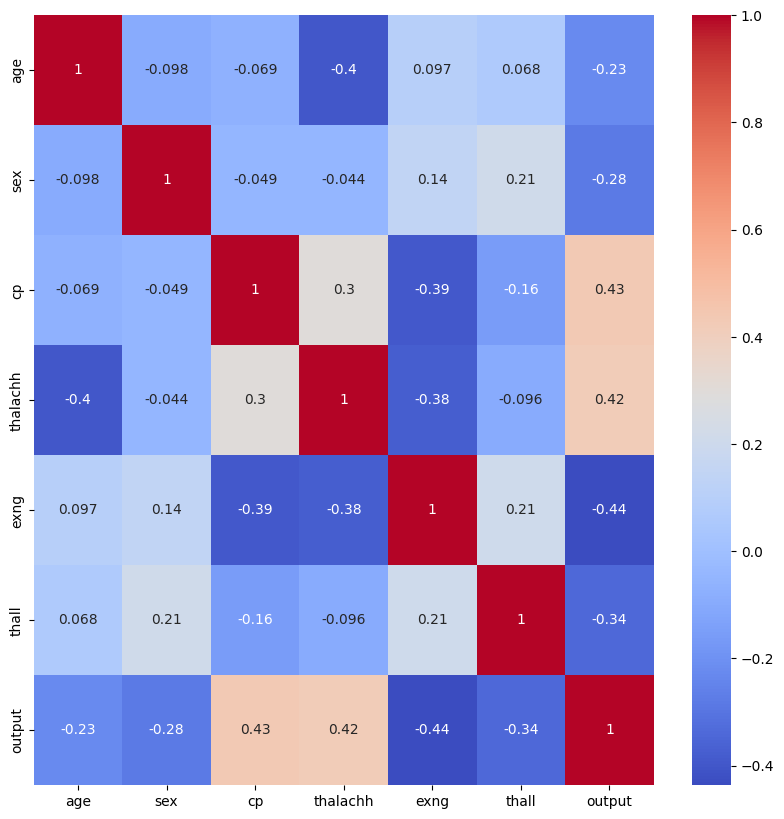

In [12]:
# graph of the corr
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Modelate

In [13]:
df.head()

,age,sex,cp,thalachh,exng,thall,output
0,63,1,3,150,0,1,1
1,37,1,2,187,0,2,1
2,41,0,1,172,0,2,1
3,56,1,1,178,0,2,1
4,57,0,0,163,1,2,1


## Split Data

In [14]:
# Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)


X_train, X_test, y_train, y_test = train_test_split(
    df.drop("output", axis=1),
    df["output"],
    random_state=42,
    test_size=0.2,
)

In [15]:
# Eliminamos el Id del pasajero en el conjunto de datos de prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 6), (61, 6), (242,), (61,))

## Model Perceptron


In [16]:
from sklearn.linear_model import Perceptron

In [17]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)
# Calculate his accuracy of the perceptron
acc_perceptron = accuracy_score(y_test, predictions)
# Print the accuracy
print(acc_perceptron)

0.5409836065573771


## Model Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# print accuracy
acc_gnb =accuracy_score(y_test, y_pred)
print(acc_gnb)

0.8524590163934426


## Model Regresion Logistic

In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

### SGDClassifier

In [21]:
logistic_model_SGD = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=0.01)
logistic_model_SGD.fit(X_train, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss')

In [22]:
print(f'Clases de la variable dependiente: {logistic_model_SGD.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model_SGD.coef_)

Clases de la variable dependiente: [0 1]


Vectores de coeficientes:
[[-5.86834585 -2.43189407  5.22456311  0.97217173 -2.71149186 -3.72321399]]


In [23]:
y_pred = logistic_model_SGD.predict(X_train)

Accuracy entrenamiento: 0.45454545454545453
Matriz de confusión:


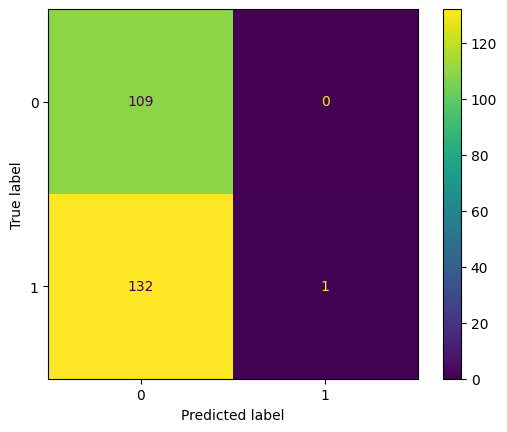

In [24]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred)}')
print('Matriz de confusión:')
matriz_confusion = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

In [25]:
y_pred_test = logistic_model_SGD.predict(X_test)

Accuracy testing: 0.47540983606557374
Matriz de confusión:


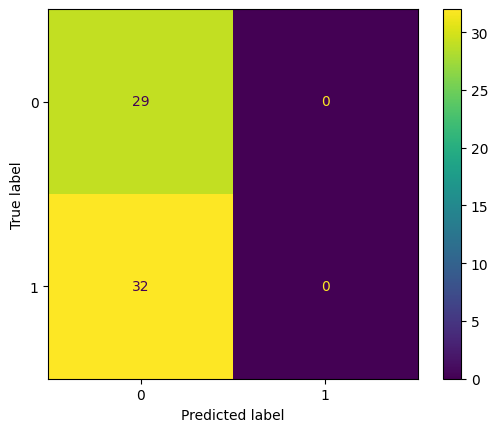

In [26]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test)}')
print('Matriz de confusión:')
matriz_confusion_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

### LogisticRegression

In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

d:\Codes\PC3-IA\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print(f'Clases de la variable dependiente: {logistic_model.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model.coef_)

Clases de la variable dependiente: [0 1]


Vectores de coeficientes:
[[-0.03960628 -1.40610823  0.65269241  0.02581668 -1.03298523 -0.8367322 ]]


In [29]:
y_pred_2 = logistic_model.predict(X_train)

Accuracy entrenamiento: 0.7644628099173554
Matriz de confusión:


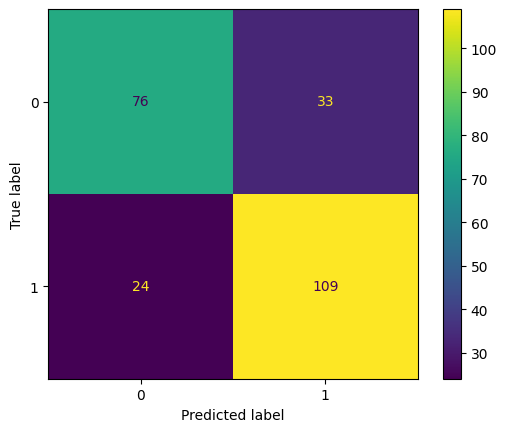

In [30]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred_2)}')
print('Matriz de confusión:')
matriz_confusion_2 = confusion_matrix(y_train, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

In [31]:
y_pred_test_2 = logistic_model.predict(X_test)

Accuracy testing: 0.8360655737704918
Matriz de confusión:


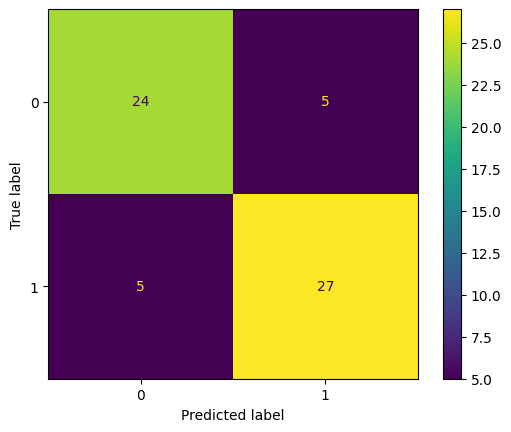

In [32]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test_2)}')
print('Matriz de confusión:')
matriz_confusion_test_2 = confusion_matrix(y_test, y_pred_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

### ANN

In [33]:
# Use network neural
from keras.models import Sequential
from keras.layers import Dense, Input

In [34]:
## Con sequetial podemos construir una red neuronal apilando capas
modelsequ = Sequential()
modelsequ.add(Input(shape=(X_train.shape[1],)))
modelsequ.add(Dense(5, activation='relu'))
modelsequ.add(Dense(1, activation='sigmoid'))
modelsequ.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
modelsequ.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
historyseq = modelsequ.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=16,
    workers=4,
)

Epoch 1/500
16/16 [==============================] - 1s 13ms/step - loss: 1.3616 - accuracy: 0.5496 - val_loss: 1.0491 - val_accuracy: 0.5246
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8597 - accuracy: 0.5496 - val_loss: 0.7315 - val_accuracy: 0.5246
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5496 - val_loss: 0.6896 - val_accuracy: 0.5246
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4835 - val_loss: 0.6951 - val_accuracy: 0.4754
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5246
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5496 - val_loss: 0.6880 - val_accuracy: 0.5246
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5496 - val_loss: 0.6901 - val_accuracy: 0.5246
Epoch 8/500


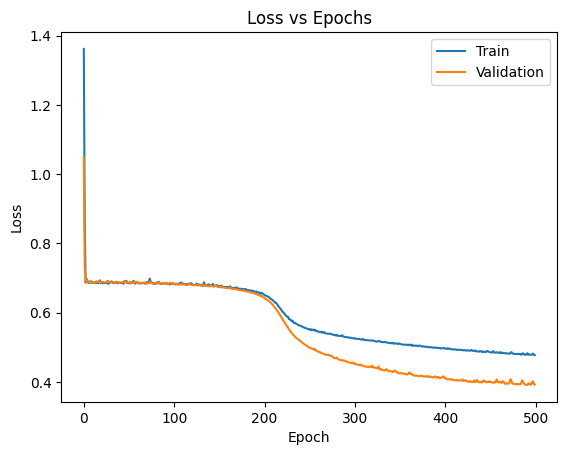

In [36]:
# graph of loss 
plt.plot(historyseq.history['loss'])
plt.plot(historyseq.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN

In [37]:
# Import lib for convolutional neural network
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

In [38]:
X_train.shape

(242, 6)

In [41]:
modelconv = Sequential()
# modelconv.add(tf.keras.Input(shape=(10,)))
modelconv.add(Conv1D(4, 3, activation="relu", input_shape=(X_train.shape[1], 1)))
modelconv.add(MaxPooling1D())
modelconv.add(Flatten())
modelconv.add(Dense(4, activation="relu"))
modelconv.add(Dropout(0.1))
modelconv.add(Dense(1, activation="sigmoid"))
modelconv.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
modelconv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 4)              16        
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 4)              0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                      

In [42]:
# Train the model
historyconv = modelconv.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=8
)

Epoch 1/500
31/31 [==============================] - 1s 14ms/step - loss: 10.0092 - accuracy: 0.4421 - val_loss: 6.5073 - val_accuracy: 0.4754
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 4.3883 - accuracy: 0.4711 - val_loss: 2.4430 - val_accuracy: 0.4754
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 2.0310 - accuracy: 0.4545 - val_loss: 1.4143 - val_accuracy: 0.4754
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 1.1960 - accuracy: 0.4669 - val_loss: 0.9107 - val_accuracy: 0.4754
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.4587 - val_loss: 0.6922 - val_accuracy: 0.5082
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5537 - val_loss: 0.6499 - val_accuracy: 0.7377
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6198 - val_loss: 0.6487 - val_accuracy: 0.7377
Epoch 8/500